In [412]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import re
import string

In [413]:
base = pd.read_csv('stock_data.csv')

In [414]:
pln = spacy.load('en_core_web_sm')
pln

In [415]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
print(stop_words) # Plavras que não ajudam a classificar um texto

{'even', 'moreover', 'next', 'bottom', 'several', 'hers', 'became', 'front', 'above', 'ten', 'my', 'now', 'was', 'seeming', 'an', 'whereby', 'others', 'against', 'say', 'name', 'they', 'he', 'can', 'below', 'twenty', 'she', 'meanwhile', 'yours', 'if', 'only', 'again', 'their', 'something', 'up', 'cannot', 'whereas', 'because', 'yet', 'myself', 'no', 'ours', 'first', 'towards', 'we', 'everyone', 'before', 'of', 'his', 'nine', 'other', 'besides', 'him', 'three', '’d', 'with', 'on', 'anything', 'herein', 'in', "'s", 'becomes', 'amount', 'nowhere', "n't", 'together', 'the', '‘m', 'these', 'toward', 'than', 'but', 'whereupon', 'her', 'someone', 'beyond', 'us', 'whatever', 're', 'off', 'every', 'using', 'n’t', '‘re', 'seemed', 'could', 'why', 'forty', 'mostly', 'done', 'regarding', 'am', 'your', 'least', 'that', 'though', 'really', 'somehow', 'be', 'via', 'more', '‘s', 'have', 'all', 'thereupon', 'hereafter', 'quite', 'who', 'a', 'various', 'see', 'move', 'always', 'along', 'while', 'yoursel

In [416]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [417]:
# É preciso deixar todas as letras minusculas
def preprocessamento(texto):
    texto = texto.lower()
    texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto) # Expressão regular para tirar o nome de usuario
    texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)
    texto = re.sub(r" +", ' ', texto)

    documento = pln(texto)
    lista = []
    for token in documento:
        lista.append(token.lemma_) # Transforma as palavras na sua base semantica primordial
    
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    
    return lista

In [418]:
base['Text'] = base['Text'].apply(preprocessamento)

In [419]:
base.head()

,Text,Sentiment
0,kicker watchlist xide tit soq pnk cpw bpz aj t...,1
1,user aap movie return fea geed indicator trade...,1
2,user I afraid short amzn look like near monopo...,1
3,mnta 12.00,1
4,oi 21.37,1


In [420]:
base['tamanho'] = base['Text'].apply(len)
base.head()

,Text,Sentiment,tamanho
0,kicker watchlist xide tit soq pnk cpw bpz aj t...,1,74
1,user aap movie return fea geed indicator trade...,1,59
2,user I afraid short amzn look like near monopo...,1,77
3,mnta 12.00,1,10
4,oi 21.37,1,8


In [421]:
base['tamanho'].describe()

count    5791.000000
mean       48.312554
std        23.987764
min         0.000000
25%        29.000000
50%        48.000000
75%        66.000000
max       129.000000
Name: tamanho, dtype: float64

In [422]:
positivo = base[base['Sentiment'] == 1]

In [423]:
positivo.describe()

,Sentiment,tamanho
count,3685.0,3685.000000
mean,1.0,47.480868
std,0.0,23.921718
min,1.0,0.000000
25%,1.0,28.000000
50%,1.0,47.000000
75%,1.0,65.000000
max,1.0,129.000000


In [424]:
negativo = base[base['Sentiment'] == -1]

In [425]:
negativo.describe()

,Sentiment,tamanho
count,2106.0,2106.000000
mean,-1.0,49.767806
std,0.0,24.039432
min,-1.0,2.000000
25%,-1.0,30.000000
50%,-1.0,50.000000
75%,-1.0,68.000000
max,-1.0,117.000000


NUVEM DE PALAVRAS

In [426]:
textos_positivos = positivo['Text'].tolist()
len(textos_positivos)

3685

In [427]:
textos_positivos[0:10]

['kicker watchlist xide tit soq pnk cpw bpz aj trade method method prev post',
 'user aap movie return fea geed indicator trade year awesome',
 'user I afraid short amzn look like near monopoly ebook infrastructure service',
 'mnta 12.00',
 'oi 21.37',
 'pgnx 3.04',
 'goog ower trend line channel test volume support',
 'aap watch tomorrow ong entry',
 'I assume fcx open tomorrow 34.25 trigger buy like setup',
 'worry I expect market rally usually exact opposite happen time shall soon bac spx jpm']

In [428]:
textos_positivos_string = ' '.join(textos_positivos)

In [429]:
len(textos_positivos_string)

178651

In [430]:
from wordcloud import WordCloud

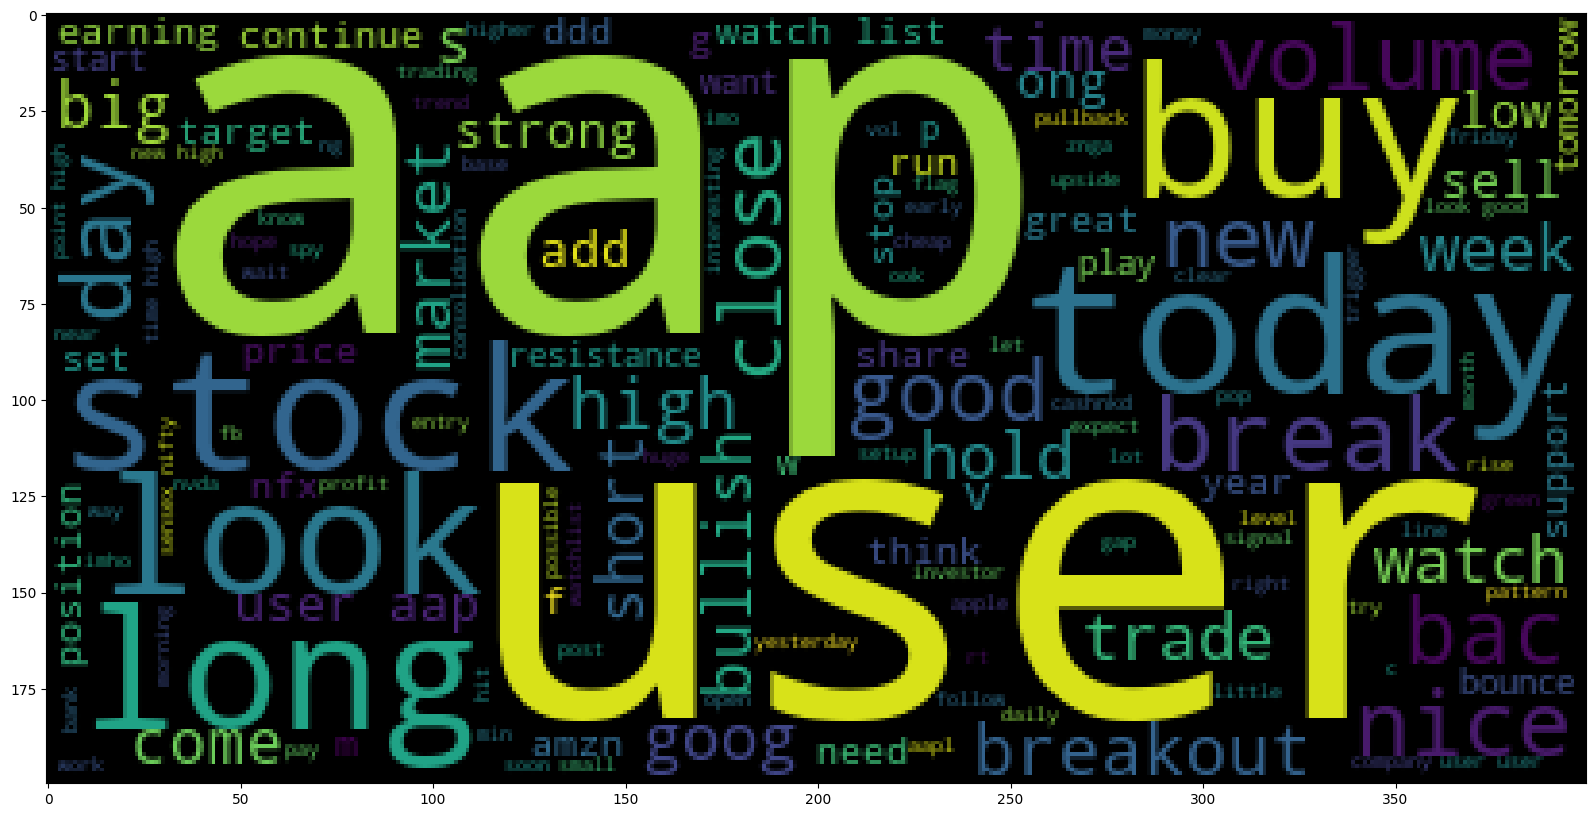

In [431]:
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(textos_positivos_string))

In [432]:
textos_negativos = negativo['Text'].tolist()
textos_negativos_string = ' '.join(textos_negativos)

In [433]:
len(textos_negativos_string)

106916

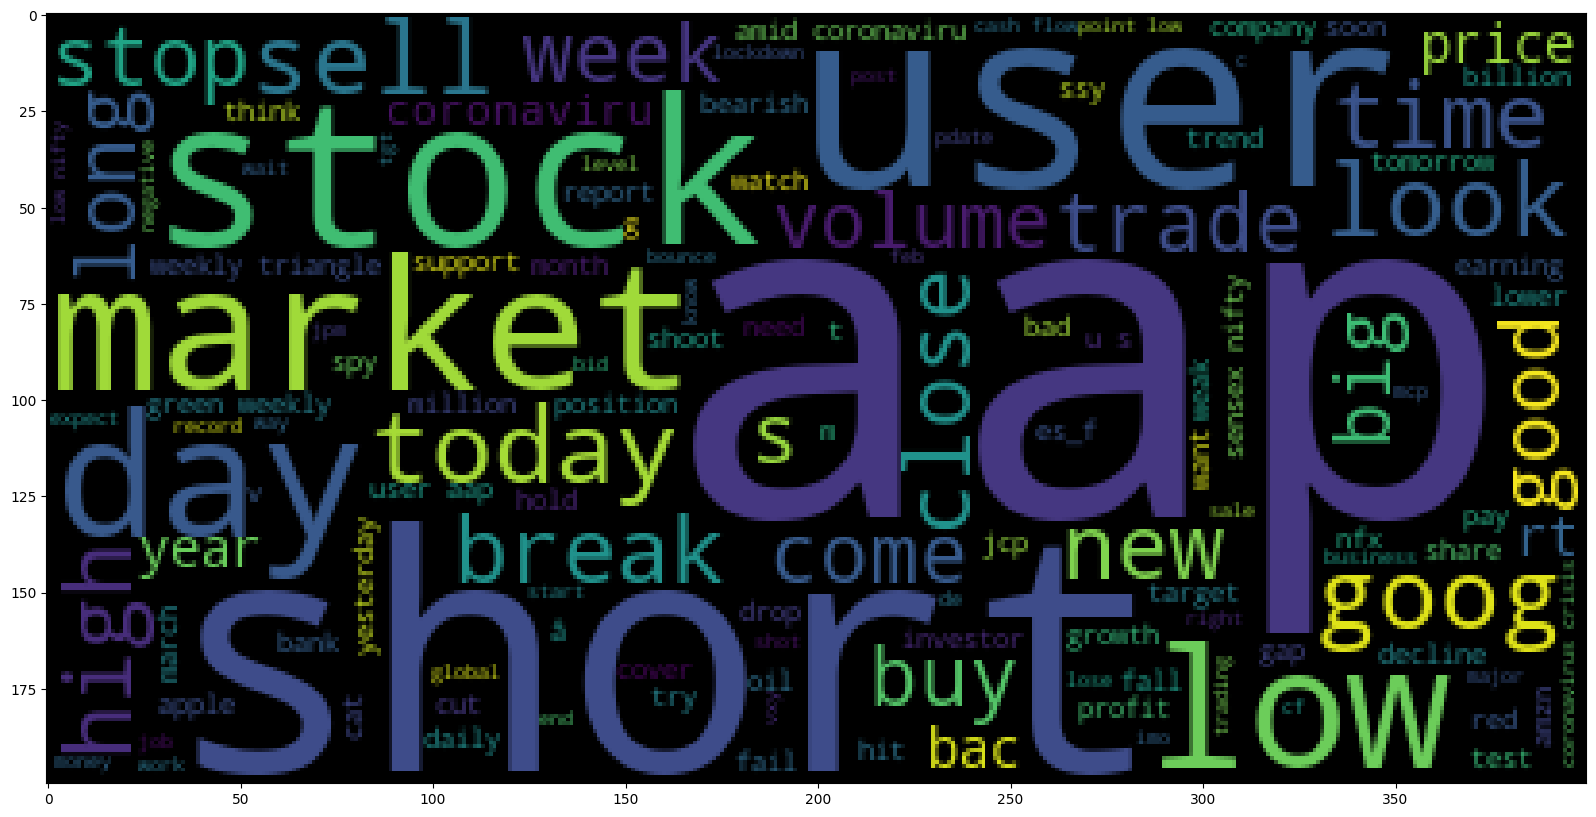

In [434]:
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(textos_negativos_string))

EXTRAÇÃO DE ENTIDADES NOMEADAS

In [435]:
# Objetivo é procurar o nome das empresas
documento = pln(textos_positivos_string)

In [ ]:
from spacy import displacy
displacy.render(documento, style = 'ent', jupyter = True)

In [437]:
empresas_positivas = []
for entidade in documento.ents:
    if entidade.label_ == 'ORG':
        print(entidade.text, entidade.label_)
        empresas_positivas.append(entidade.text)

zcs ORG
gm ORG
jcp p ORG
phantom7 ORG
mca ORG
bet stock ORG
kreme doughnuts inc ic xchange ORG
massachusetts state automobile dealer association ORG
mako ORG
amzn datum ORG
cva ORG
ford ORG
cbs ORG
kos ORG
cy'14 revenue upside ORG
maco ORG
ots ORG
intel ORG
mon ORG
s&p ORG
ove trucking co. ORG
wells fargo wfc deliver moon ORG
nkd sina ORG
morgan stanley ORG
itb ORG
un ORG
xmas ORG
vfc ORG
lleva la sesi?n ORG
el rally ORG
abc ORG
zcs ORG
mkt ORG
trigger cent ORG
ec ORG
bac p p ORG
pgx ORG
bull flag pattern ORG
intel ORG
wt ocn ebay tex ORG
csn sa ORG
ge ORG
bac bank america ORG
ibm ORG
ko ORG
ibm ORG
google ORG
vision csx ORG
cnbc ORG
ibm ORG
mkt ORG
ibm ORG
ibm ORG
big ibm p ORG
ibm ORG
nfx swy safeway inc bullishness march earning hov ORG
cash+securitie 137.1b ORG
points.technicals/saye ORG
pwmo2 ORG
triangle pby ORG
mkt ORG
cox csc cof need ORG
ots ORG
caterpillar ORG
mako ORG
gpo ORG
boeing ORG
cbi ORG
fio ORG
onxx nve bgcp ORG
cbs dis infn 7.20 ORG
gae ORG
marijuana ORG
mjns cbis h

In [438]:
len(empresas_positivas)

290

In [439]:
empresas_positivas = set(empresas_positivas)

In [440]:
len(empresas_positivas)

207

In [441]:
print(empresas_positivas)

{'vng', 'states steel corp', 'c&h', 'mjns cbis hemp', 'eod', 'kansas city ailroad cent', 'angi healthcare', 'ng correlate possible correction', 'el rally', 'wt ocn ebay tex', 'zcs pps', 'ema cross', 'cash+securitie 137.1b', 'base p', 'cme', 'bet stock', 'scale p nfg', 'scale p e ng', 'edon peix', 'ec', 'google', 'zb', 'scale p v watch', 'ford', 'cipla tata motor bajaj', 'korea inc investor', 'cen packaging corp pkg', 'nsc', 'najarian pps', 'ge', 'mar6', 'div inc', 'nfx swy safeway inc bullishness march earning hov', 'chrysler', 's&p', 'dia infn stock paul tudor', 'flag+horizontal', 'ma dollar general corporation', 'van noida', 'samsung', 'chase wells fargo', 'mea p', 'nc corp ed', '200ma', 'harmonic w', 'sears', 'vision csx', 'time!!cnbc', 'che home', 'chase', 'cmg cbmx', 'jva', 'ip5s', 'tek exact pattern cbmx', 'points.technicals/saye', 'bac p p', 'csod conf', 'triangle v test 50ema', 'scale p ong position vng offt', 'zcs', 'dis eye disney', 'fns', 'golden cross daily react', 'zcs p',

In [442]:
# Objetivo é procurar o nome das empresas
documento = pln(textos_negativos_string)

In [443]:
empresas_negativas = []
for entidade in documento.ents:
    if entidade.label_ == 'ORG':
        print(entidade.text, entidade.label_)
        empresas_negativas.append(entidade.text)

bet friday ORG
sony ORG
fed ORG
mako ORG
mkt ORG
zagg ORG
decine p spin high ORG
triangle ORG
bil mkt cap ORG
mcp perform expect ORG
aci dmnd ORG
axas pst p kcg mnta nav ORG
mgm catch ange ORG
mkt ORG
mcp sort ORG
ssys ORG
mkt ORG
cie cox cmg ORG
hoy ORG
triangle ORG
ssys ORG
ssys ORG
nissan ORG
netflix bull ORG
jan gain watch ORG
ibm ORG
automotive inc option ORG
kdj time ORG
treasury ORG
ibm ORG
channel bull ORG
ots ORG
vmw ORG
cbs ORG
nkd eade stock lag ORG
mov ORG
mkt ORG
amzn ntap ibm ORG
hsbc ORG
comex ORG
triangle pby ORG
mkt ORG
mkt ORG
ngt ORG
fed ORG
cb intervention gd ORG
kos ORG
triangle pby ORG
aixg jbht nhi ORG
ots ORG
al v dell inc case detail iaci ORG
short// ORG
ec ORG
cee ORG
cnbc ORG
s&p ORG
cnbc ORG
cnbc ORG
ec ORG
ibm ORG
hsbc shortfest ORG
ec ORG
s&p ORG
microsoft ORG
scale p ORG
eod ORG
un ORG
gm ORG
dia hurricane fag ORG
eod ORG
wal mart ORG
dmd ORG
deutsche bank ORG
fed ORG
ema ORG
wal mart ORG
triangle ORG
fed ORG
kos ORG
wal mart de mexico 4q ORG
faz ORG
bloo

In [444]:
len(empresas_negativas)

168

In [445]:
empresas_negativas = set(empresas_negativas)

In [446]:
len(empresas_negativas)

120

In [447]:
print(empresas_negativas)

{'al v dell inc case detail iaci', 'zagg sue bunch critic eg', 'nissan', 'eod', 'trigger', 'morgan fund', 'ssys', 'mcp sort', 'decine p spin high', 'wal mart de mexico 4q', 'tata steel europe', 'kdj time', 'sony', 'ec', 'google', 'rt home', 'united nations', 'short//', 'ge', 's&p', 'bloomberg tv', 'nkd eade stock lag', 'samsung', 'apo nem cf ed', 's p', 'intensifie', 'automotive inc option', 'mcp perform expect', 'bet friday', 'u.s company china', 'flat kijun', 'cbs', 'amzn ntap ibm', 'ps', 'scale p', 'bil mkt cap', 'u.s treasury', 'aixg jbht nhi', 'tinker', 'hsbc', 'cee', 'ebay', 'nok', 'hsbc shortfest', 'netflix bull', 'dnb', 'gartner report', 'jcp', '200ma p', 'treasury', 'vmw', 'penney', 'triangle', 'gm', 'congress', 'comex', 'cie cox cmg', 'channel bull', 'wi', 'wells fargo face restriction', 'ibm', 'microsoft', 'dia', 'oxford economic project', 'ema', 'faz', 'zagg', 'update china', 'wal mart', 'warner', 'kos', 'luckin coffee', 'kotak mahindra bank', 'dia hurricane fag', 'oecd', '

In [448]:
empresas_positivas_negativas = empresas_negativas.intersection(empresas_positivas) # EMPRESAS NOS TEXTOS BONS E RUINS

In [449]:
len(empresas_positivas_negativas)

28

In [450]:
empresas_somente_positivas = empresas_positivas.difference(empresas_negativas) # EMPRESAS NOS TEXTOS BONS E RUINS # EMPRESAS QUE SÓ ESTÃO NOS TEXTOS BONS

In [451]:
len(empresas_somente_positivas)

179

In [452]:
empresas_somente_negativas = empresas_negativas.difference(empresas_positivas) 

In [453]:
len(empresas_somente_negativas)

92

TRATAMENTO DA BASE DE DADOS

In [454]:
base.drop(['tamanho'], axis = 1, inplace = True)

In [455]:
from sklearn.model_selection import train_test_split
base_treinamento, base_teste = train_test_split(base, test_size=0.25)

In [456]:
base_treinamento.shape

(4343, 2)

In [457]:
base_teste.shape

(1448, 2)

In [458]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}], ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [459]:
base_treinamento_final = []
for texto, sentimento in zip(base_treinamento['Text'], base_treinamento['Sentiment']):
    if sentimento == 1:
        dic =  ({'POSITIVO': True, 'NEGATIVO': False})
    elif sentimento == -1:
        dic =  ({'POSITIVO': False, 'NEGATIVO': True})
    base_treinamento_final.append([texto, dic.copy()])

In [460]:
len(base_treinamento_final)

4343

In [461]:
base_treinamento_final

[['bto amzn feb olle dice', {'POSITIVO': False, 'NEGATIVO': True}],
 ['user I pick I kkd food company dpz like run twenty13',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['travel hospitality time recover post lockdown expert \n ',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['dcth target acheive', {'POSITIVO': True, 'NEGATIVO': False}],
 ['shd time kmart sear people', {'POSITIVO': False, 'NEGATIVO': True}],
 ['look good 22.50 :)', {'POSITIVO': True, 'NEGATIVO': False}],
 ['chtp try level 1.95 stop', {'POSITIVO': True, 'NEGATIVO': False}],
 ['economy certainly enter recession affect world severity unmatched anytâ€ ¦',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['green weekly triangle hek, ... sell short 3.96',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['user aap trader attract round number like sure stock trade computer',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['sensex nifty extend loss second day amid rise coronavirus case \n ',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['foreign i

CRIACAO DO CLASSIFICADOR

In [462]:
import random
from spacy.training.example import Example

In [463]:
modelo = spacy.blank('en') # CRIA MODELO EM INGLES
categorias = modelo.add_pipe("textcat")
categorias.add_label('POSITIVO')
categorias.add_label('NEGATIVO')
historico = []

In [464]:
base_treinamento_original = base_treinamento_final

# Convertendo para o formato necessário para o treinamento do spaCy
base_treinamento_final = []
for texto, categorias in base_treinamento_original:
    # Convertendo as categorias para o formato correto
    categorias_convertidas = {categoria: True if valor else False for categoria, valor in categorias.items()}
    # Adicionando o par (texto, categorias) à lista final
    base_treinamento_final.append((texto, categorias_convertidas))

print(base_treinamento_final)


[('bto amzn feb olle dice', {'POSITIVO': False, 'NEGATIVO': True}), ('user I pick I kkd food company dpz like run twenty13', {'POSITIVO': True, 'NEGATIVO': False}), ('travel hospitality time recover post lockdown expert \n ', {'POSITIVO': False, 'NEGATIVO': True}), ('dcth target acheive', {'POSITIVO': True, 'NEGATIVO': False}), ('shd time kmart sear people', {'POSITIVO': False, 'NEGATIVO': True}), ('look good 22.50 :)', {'POSITIVO': True, 'NEGATIVO': False}), ('chtp try level 1.95 stop', {'POSITIVO': True, 'NEGATIVO': False}), ('economy certainly enter recession affect world severity unmatched anytâ€ ¦', {'POSITIVO': False, 'NEGATIVO': True}), ('green weekly triangle hek, ... sell short 3.96', {'POSITIVO': False, 'NEGATIVO': True}), ('user aap trader attract round number like sure stock trade computer', {'POSITIVO': True, 'NEGATIVO': False}), ('sensex nifty extend loss second day amid rise coronavirus case \n ', {'POSITIVO': False, 'NEGATIVO': True}), ('foreign investor pull rs 12,478 

In [465]:
# Inicia o treinamento do modelo
modelo.begin_training()

# Número de épocas de treinamento
for epoca in range(5):
    # Mistura os textos em sua base de treinamento
    random.shuffle(base_treinamento_final)
    
    # Dicionário para armazenar os erros de cada iteração
    erros = {}
    
    # Loop sobre os lotes (minibatches) de dados de treinamento
    for batch in spacy.util.minibatch(base_treinamento_final, 512):
        # Converte os lotes em exemplos do spaCy
        exemplos = []
        for texto, entidades in batch:
            doc = modelo.make_doc(texto)
            exemplo = Example.from_dict(doc, {"cats": entidades})
            exemplos.append(exemplo)
        
        # Atualiza o modelo com os exemplos
        modelo.update(exemplos, losses=erros)
        
        # Armazena os erros desta iteração
        historico.append(erros)
    
    # Imprime os erros a cada época (opcional)
    if epoca % 1 == 0:
        print(erros)



{'textcat': 2.0806181877851486}
{'textcat': 1.5382613241672516}
{'textcat': 0.9809915125370026}
{'textcat': 0.4685700386762619}
{'textcat': 0.15363124012947083}


In [466]:
historico

[{'textcat': 2.0806181877851486},
 {'textcat': 2.0806181877851486},
 {'textcat': 2.0806181877851486},
 {'textcat': 2.0806181877851486},
 {'textcat': 2.0806181877851486},
 {'textcat': 2.0806181877851486},
 {'textcat': 2.0806181877851486},
 {'textcat': 2.0806181877851486},
 {'textcat': 2.0806181877851486},
 {'textcat': 1.5382613241672516},
 {'textcat': 1.5382613241672516},
 {'textcat': 1.5382613241672516},
 {'textcat': 1.5382613241672516},
 {'textcat': 1.5382613241672516},
 {'textcat': 1.5382613241672516},
 {'textcat': 1.5382613241672516},
 {'textcat': 1.5382613241672516},
 {'textcat': 1.5382613241672516},
 {'textcat': 0.9809915125370026},
 {'textcat': 0.9809915125370026},
 {'textcat': 0.9809915125370026},
 {'textcat': 0.9809915125370026},
 {'textcat': 0.9809915125370026},
 {'textcat': 0.9809915125370026},
 {'textcat': 0.9809915125370026},
 {'textcat': 0.9809915125370026},
 {'textcat': 0.9809915125370026},
 {'textcat': 0.4685700386762619},
 {'textcat': 0.4685700386762619},
 {'textcat': 0

In [467]:
historico_erro = []
for i in historico:
    historico_erro.append(i.get('textcat'))

In [468]:
historico_erro = np.array(historico_erro)

Text(0, 0.5, 'Erro')

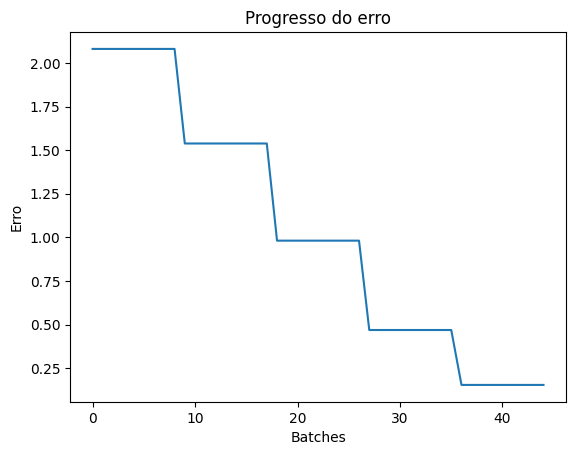

In [469]:
import matplotlib.pyplot as plt
plt.plot(historico_erro)
plt.title('Progresso do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [470]:
modelo.to_disk('modelo')

TESTE COM UMA FRASE

In [471]:
modelo_carregado = spacy.load('modelo')

In [472]:
base_teste.reset_index(inplace=True)

In [473]:
base_teste.head(15)

,index,Text,Sentiment
0,5539,coronavirus induce weakness rupee linger near ...,-1
1,2028,yhoo like pe vc w biz .. hold big position yah...,1
2,603,oc ose mkt share jds t look low price miss ear...,-1
3,1856,hour advanced cc edmc bks hayn pim ezpw mc dgi...,1
4,347,ctic long,1
5,1666,q4 operational cash flow 35million 141mil q420...,-1
6,93,kcg ... thing hmmmm,1
7,3043,aap value share plaything ultra rich like play...,1
8,4236,anad 2.14 aunch pad,1
9,3835,user aap divi announce come monday march 19th ...,1


In [474]:
base_teste.index

RangeIndex(start=0, stop=1448, step=1)

In [475]:
primeiro_positivo = 0
count_positivo = 0
for index, valor in enumerate(base_teste['Sentiment']):
    if valor == 1:
        count_positivo = 1
        primeiro_positivo = index
        break
if count_positivo == 0:
    print('Não há textos positivos na base de teste')  

In [476]:
primeiro_negativo = 0
count_negativo = 0
for index, valor in enumerate(base_teste['Sentiment']):
    if valor == 1:
        count_negativo = 1
        primeiro_negativo = index
        break
if count_negativo == 0:
    print('Não há textos negativos na base de teste') 

In [477]:
texto_positivo = base_teste['Text'][primeiro_positivo]
texto_positivo

'yhoo like pe vc w biz .. hold big position yahoo japan 32.5 ytd help balance sheet .. position alibaba'

In [478]:
previsao = modelo_carregado(texto_positivo)
previsao

yhoo like pe vc w biz .. hold big position yahoo japan 32.5 ytd help balance sheet .. position alibaba

In [479]:
previsao.cats
# Como positivo deu maior, o algoritmo funciona

{'POSITIVO': 0.9876748323440552, 'NEGATIVO': 0.012325160205364227}

In [480]:
texto = "AMAZON is a great company"
texto = preprocessamento(texto)
texto

'amazon great company'

In [481]:
modelo_carregado(texto).cats

{'POSITIVO': 0.9892501831054688, 'NEGATIVO': 0.010749776847660542}

In [482]:
texto_negativo = base_teste['Text'][primeiro_negativo]

In [483]:
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'POSITIVO': 0.9876748323440552, 'NEGATIVO': 0.012325160205364227}

AVALIAÇÃO DO MODELO

In [484]:
previsoes = []
for texto in base_teste['Text']:
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [485]:
previsoes[:5]

[{'POSITIVO': 0.04090102016925812, 'NEGATIVO': 0.9590989947319031},
 {'POSITIVO': 0.9876748323440552, 'NEGATIVO': 0.012325160205364227},
 {'POSITIVO': 0.44013532996177673, 'NEGATIVO': 0.5598646998405457},
 {'POSITIVO': 0.7844563722610474, 'NEGATIVO': 0.21554355323314667},
 {'POSITIVO': 0.9990658164024353, 'NEGATIVO': 0.0009341450640931726}]

In [486]:
len(previsoes)

1448

In [487]:
previsoes_final = []
for previsao in previsoes:
    if previsao['POSITIVO'] > previsao['NEGATIVO']:
        previsoes_final.append(1)
    else:
        previsoes_final.append(-1)
previsoes_final = np.array(previsoes_final)

In [488]:
respostas_reais = base_teste['Sentiment'].values
respostas_reais

array([-1,  1, -1, ...,  1, -1, -1], dtype=int64)

In [489]:
# Se fosse uma base de dados mais fácil, o resultado seria maior
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(respostas_reais, previsoes_final)

0.7327348066298343

In [490]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[316, 191],
       [196, 745]], dtype=int64)

<Axes: >

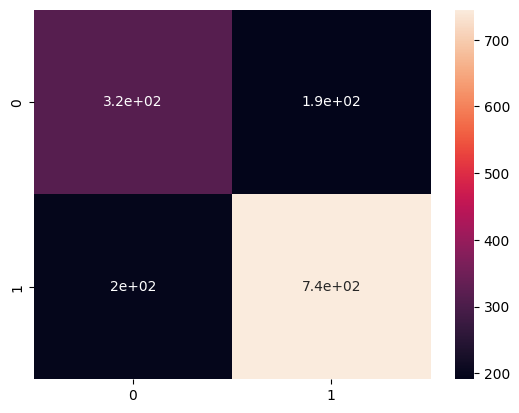

In [491]:
sns.heatmap(cm, annot=True)

In [492]:
print(classification_report(respostas_reais, previsoes_final))

              precision    recall  f1-score   support

          -1       0.62      0.62      0.62       507
           1       0.80      0.79      0.79       941

    accuracy                           0.73      1448
   macro avg       0.71      0.71      0.71      1448
weighted avg       0.73      0.73      0.73      1448

